i210260
Ehtsham Walidad
AI-K

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self):
        self.weights = None
        self.gradient=None
        self.prediction=None
        self.errors=None
        self.loss=None
        self.setosa=None
        self.versicolor=None
        self.verginica=None
    def sigmoid(self,sig_x):
        return 1 / (1 + np.exp(-(sig_x)))
    def Predictions(self,X):
        pred_x= np.dot(X, self.weights)
        self.prediction= self.sigmoid(pred_x)
    def error(self,Y):
        self.errors =  Y.reshape(-1, 1)  - self.prediction
    def Gradient_descent(self,Y,X,alpha,m):
        self.gradient = (1 / m) * np.dot(X.T, self.errors)
        self.weights += alpha * self.gradient
    def cost_fun(self,Y):
        self.loss = -np.mean(Y.reshape(-1, 1) * np.log(self.prediction) + (1 - Y.reshape(-1, 1)) * np.log(1 - self.prediction))
    def predict(self, X):
        if self.weights is None:
            raise ValueError("Model not trained. Please train the model first.")
        return  np.dot(X, self.weights)
    def train(self, X, Y, alpha=0.01, max_iterations=100, print_interval=5):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        for iteration in range(max_iterations):
            self.Predictions(X)
            self.error(Y)
            self.Gradient_descent(Y,X,alpha,m)

            if iteration % print_interval == 0:
                self.cost_fun(Y)
                print(f"Iteration {iteration}, Loss: {self.loss}")


    def onevsall_train(self,X,y,alpha=0.01, max_iterations=100, print_interval=5):
        y_setosa = np.array(y.map({'setosa':1, 'versicolor':0, 'virginica':0}))
        y_versicolor = np.array(y.map({'setosa':0, 'versicolor':1, 'virginica':0}))
        y_verginica = np.array(y.map({'setosa':0, 'versicolor':0, 'virginica':1}))

        X_train_bias = np.c_[np.ones((X.shape[0], 1)), X]

        setosa = LogisticRegression()
        versicolor = LogisticRegression()
        verginica = LogisticRegression()

        setosa.train(X_train_bias, y_setosa, alpha, max_iterations, print_interval)
        versicolor.train(X_train_bias, y_versicolor, alpha, max_iterations, print_interval)
        verginica.train(X_train_bias, y_verginica, alpha, max_iterations, print_interval)

        print('Setosa: ',setosa.get_weights())
        print('Versicolor: ',versicolor.get_weights())
        print('Verginice: ',verginica.get_weights())

        self.setosa=setosa
        self.versicolor=versicolor
        self.verginica=verginica

    def predict_confidence(self,X):
        X_train_bias = np.c_[np.ones((X.shape[0], 1)), X]
        setosa_predictions = self.setosa.predict(X_train_bias)
        versicolor_predictions = self.versicolor.predict(X_train_bias)
        verginica_predictions = self.verginica.predict(X_train_bias)

        label=[]
        for i in range(len(setosa_predictions)):
            max_num= max( setosa_predictions[i], versicolor_predictions[i],verginica_predictions[i])
            if max_num == setosa_predictions[i]:
                label.append(0)
            elif max_num == versicolor_predictions[i]:
                label.append(1)
            else:
                label.append(2)
        return label

    def get_weights(self):
        if self.weights is None:
            raise ValueError("Model not trained. Please train the model first.")
        return self.weights




In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target

df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


**Splitting data manually**

In [ ]:
X = iris.data
Y= df['species']

In [ ]:
X=X.tolist()

In [ ]:
len(X)

150

In [ ]:
y_train=X[:10]
y_train.extend(X[50:60])
y_train.extend(X[100:110])
y_train=np.array(y_train)

In [ ]:
train=X[10:50]
train.extend(X[60:100])
train.extend(X[110:150])

In [ ]:
train=np.array(train)
train

array([[5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3

In [ ]:
Y=list(Y)
test=Y[10:50]
test.extend(Y[60:100])
test.extend(Y[110:150])
test=pd.Series(test)

In [ ]:
y_test=Y[:10]
y_test.extend(Y[50:60])
y_test.extend(Y[100:110])
y_test=pd.Series(y_test)

In [ ]:
test

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
115    virginica
116    virginica
117    virginica
118    virginica
119    virginica
Length: 120, dtype: object

Training model


In [ ]:
model = LogisticRegression()
model.onevsall_train(train,test,alpha=0.01, max_iterations=10000, print_interval=1000)

Iteration 0, Loss: 0.6931471805599453
Iteration 1000, Loss: 0.05850038708634299
Iteration 2000, Loss: 0.031544513573036136
Iteration 3000, Loss: 0.02194247826633844
Iteration 4000, Loss: 0.01696057512683462
Iteration 5000, Loss: 0.013891090972210177
Iteration 6000, Loss: 0.011801489424649822
Iteration 7000, Loss: 0.010282750190588432
Iteration 8000, Loss: 0.009126593472830239
Iteration 9000, Loss: 0.0082155332589475
Iteration 0, Loss: 0.6931471805599453
Iteration 1000, Loss: 0.5651535463637755
Iteration 2000, Loss: 0.5484732402672592
Iteration 3000, Loss: 0.5362637715117681
Iteration 4000, Loss: 0.5271123481632577
Iteration 5000, Loss: 0.520101137696038
Iteration 6000, Loss: 0.514609980289473
Iteration 7000, Loss: 0.5102158564102007
Iteration 8000, Loss: 0.5066264245024326
Iteration 9000, Loss: 0.5036367205089479
Iteration 0, Loss: 0.6931471805599453
Iteration 1000, Loss: 0.2975752641309356
Iteration 2000, Loss: 0.2453171620386171
Iteration 3000, Loss: 0.21553182940172325
Iteration 400

Testing

In [ ]:
labels=model.predict_confidence(y_train)

30


In [ ]:
len(labels)

30

In [ ]:
actual=np.array(y_test.map({'setosa':0, 'versicolor':1, 'virginica':2}))

In [ ]:
len(actual)

30

Accuracy Score: 1.0


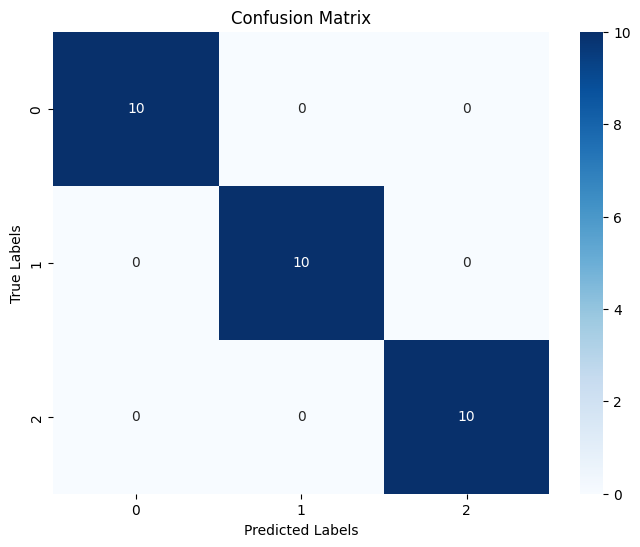

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute accuracy score
accuracy = accuracy_score(actual , labels)
print("Accuracy Score:", accuracy)


conf_matrix = confusion_matrix(actual , labels)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
